In [20]:
""" A Simple Linear Regression model is created to predict the corresponding Celsius values in Fahrenheit.
After that a neural network with additional networks is also created. """

# Imports
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt
tf.get_logger().setLevel(logging.ERROR)

In [21]:
# Training data
celsius_q = np.array([-40, -10,  0,  8, 15, 22,  38], dtype = float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],dtype = float)

In [22]:
# Lineare Regression Model is created which consists of a single Neural Dense Layer with single unit or neuron
# Input Shape has to be specified explicitly and should be equal to that of training data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_shape = [1],units = 1)
])

# Model has to be compiled before training. Loss function and Optimizer are specified during compilation
model.compile(
    loss = 'mean_squared_error',
    optimizer = tf.keras.optimizers.Adam(lr=0.1)
)

In [23]:
# Training the model. If verbose=True, some additional info is shown
history = model.fit(celsius_q,fahrenheit_a,epochs = 500,verbose = False)

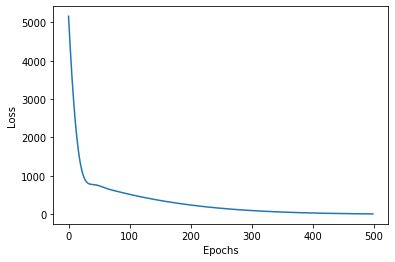

In [24]:
# Plotting the performance of model with increasing number of epochs
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [27]:
# Predicting for some value of celsius. Right value is 212
# Weights are similar to the coefficients in equation for conversion
print(model.predict([100.0]))
print(model.get_weights())

[[211.30113]]
[array([[1.8255012]], dtype=float32), array([28.751001], dtype=float32)]


In [30]:
# Making a little bit more complex model with some additional hidden layers
l0 = tf.keras.layers.Dense(units=4,input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q,fahrenheit_a,epochs=500,verbose=False)
print(model.predict([100.0]))
print(model.get_weights())
# We can see the weights and biases are much more complex for the simple equation

[[211.74742]]
[array([[ 0.12707281,  0.73038787, -0.36609006, -0.1681031 ]],
      dtype=float32), array([-1.954407 ,  3.6006536, -3.460904 ,  3.1256824], dtype=float32), array([[ 0.8823525 ,  0.33162504, -0.4634675 ,  0.86476576],
       [-1.3084699 ,  1.0201879 , -0.23758587, -0.10115051],
       [ 0.85723716, -0.59760046, -0.63494146, -0.19874285],
       [-1.2255926 ,  0.7851686 , -1.428029  ,  0.01860848]],
      dtype=float32), array([-3.568556 ,  3.6268578, -1.2975771,  2.0668352], dtype=float32), array([[-1.227651 ],
       [ 0.6914821],
       [-0.0055367],
       [ 0.2549633]], dtype=float32), array([3.3857114], dtype=float32)]
